In [1]:
import numpy as np
import qiskit as qk
import matplotlib as plt

ket0 = np.array([1, 0])
ket1 = np.array([0, 1])

display(f'ket0 / 2 + ket1 / 2 = {ket0 / 2 + ket1 / 2})')

M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 1], [1, 0]])

display(f'M1 / 2 + M2 / 2 = {M1 / 2 + M2 / 2})')

#matrices multiplication
display(f'M1 * ket0 = {np.matmul(M1, ket0)})')
display(f'M1 * ket1 = {np.matmul(M2, ket1)})')
display(f'M2 * ket0 = {np.matmul(M2, ket0)})')
display(f'M2 * ket1 = {np.matmul(M2, ket1)})')
display(f'M1 * M2 = {np.matmul(M1, M2)})')
display(f'M2 * M1 = {np.matmul(M2, M1)})')

# Quantum Statevectors
u = qk.quantum_info.Statevector([1 / np.sqrt(2), 1 / np.sqrt(2)])
v = qk.quantum_info.Statevector([(1 + 2.0j) / 3, -2 / 3])
w = qk.quantum_info.Statevector([1 / 3, 2 / 3])

display(u.draw("latex"))
display(v.draw("text"))

'ket0 / 2 + ket1 / 2 = [0.5 0.5])'

'M1 / 2 + M2 / 2 = [[1.  1. ]\n [0.5 0. ]])'

'M1 * ket0 = [1 0])'

'M1 * ket1 = [1 0])'

'M2 * ket0 = [1 1])'

'M2 * ket1 = [1 0])'

'M1 * M2 = [[2 1]\n [0 0]])'

'M2 * M1 = [[1 1]\n [1 1]])'

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

In [2]:
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())

True

True

False

In [3]:
v2 = qk.quantum_info.Statevector([(1 + 2.0j) / 3, -2 / 3])
v2.draw("latex")
v2.measure()

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

{'0': 540, '1': 460}

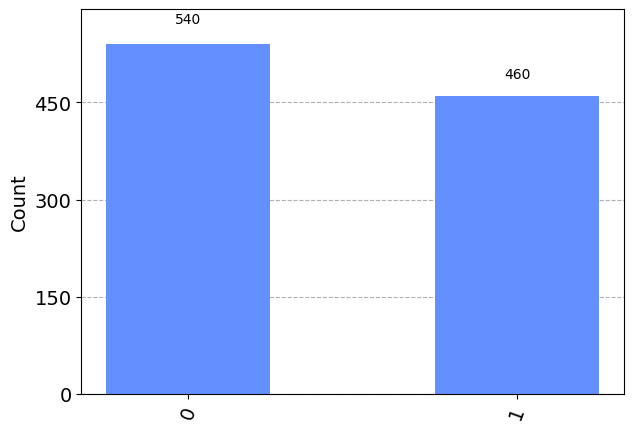

In [8]:
statistics = v2.sample_counts(1000)
display(statistics)
qk.visualization.plot_histogram(statistics)

In [13]:
X = qk.quantum_info.Operator([[0, 1], [1, 0]])
Y = qk.quantum_info.Operator([[0, -1.0j], [1.0j, 0]])
Z = qk.quantum_info.Operator([[1, 0], [0, -1]])
H = qk.quantum_info.Operator([[1 / np.sqrt(2), 1 / np.sqrt(2)], [1 / np.sqrt(2), -1 / np.sqrt(2)]])
S = qk.quantum_info.Operator([[1, 0], [0, 1.0j]])
T = qk.quantum_info.Operator([[1, 0], [0, (1 + 1.0j) / np.sqrt(2)]])

v = qk.quantum_info.Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw('latex')

<IPython.core.display.Latex object>

In [10]:
#Circuits

circuit = qk.QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [12]:
ket0 = qk.quantum_info.Statevector([1, 0])
v = ket0.evolve(circuit)
v.draw("latex")

<IPython.core.display.Latex object>

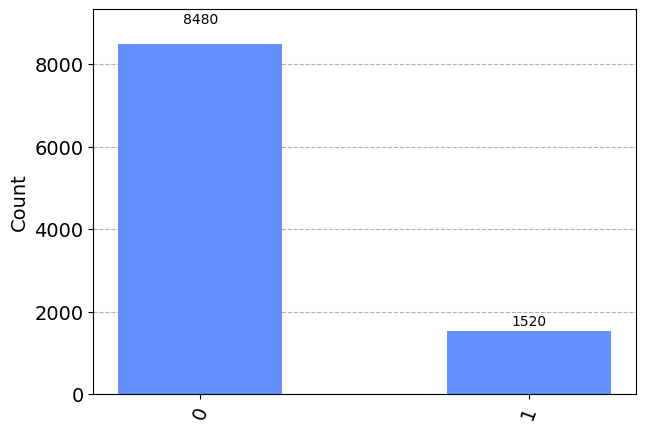

In [19]:
statistics = v.sample_counts(10000)
qk.visualization.plot_histogram(statistics)